In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data-export (1).csv")

In [4]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [5]:
import pandas as pd

# Read CSV, skipping the first row (because actual headers are on 2nd row)
df = pd.read_csv("data-export (1).csv", skiprows=1)

# Now assign your custom column names
df.columns = [
    "Channel Group",
    "Date (YYYYMMDDHH)",
    "Users",
    "Sessions",
    "Engaged Sessions",
    "Average engagement time per session",
    "Engaged sessions per user",
    "Events per session",
    "Event count",
    "Engagement rate"
]

# Reset index if needed
df = df.reset_index(drop=True)


In [5]:
df.head()

,Channel Group,Date (YYYYMMDDHH),Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Event count,Engagement rate
0,Direct,2024041623,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024041719,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024041723,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024041718,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
4,Organic Social,2024041720,175,221,112,46.918552,0.640000,4.529412,0.506787,1001


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Channel Group                        3182 non-null   object 
 1   Date (YYYYMMDDHH)                    3182 non-null   int64  
 2   Users                                3182 non-null   int64  
 3   Sessions                             3182 non-null   int64  
 4   Engaged Sessions                     3182 non-null   int64  
 5   Average engagement time per session  3182 non-null   float64
 6   Engaged sessions per user            3182 non-null   float64
 7   Events per session                   3182 non-null   float64
 8   Event count                          3182 non-null   float64
 9   Engagement rate                      3182 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 248.7+ KB


In [6]:
df["Date (YYYYMMDDHH)"] = pd.to_datetime(df["Date (YYYYMMDDHH)"], format = "%Y%m%d%H", errors= 'coerce')
df.head()

,Channel Group,Date (YYYYMMDDHH),Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Event count,Engagement rate
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel Group                        3182 non-null   object        
 1   Date (YYYYMMDDHH)                    3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged Sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Event count                          3182 non-null   float64       
 9   Engagement rate                      3182 non-null   int64         
dtypes: datetime6

In [7]:
numeric_cols = df.columns.drop(["Channel Group", "Date (YYYYMMDDHH)"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors= 'coerce')
df["Hour"] = df["Date (YYYYMMDDHH)"].dt.hour

In [19]:
df.head()

,Channel Group,Date (YYYYMMDDHH),Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Event count,Engagement rate,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel Group                        3182 non-null   object        
 1   Date (YYYYMMDDHH)                    3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged Sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Event count                          3182 non-null   float64       
 9   Engagement rate                      3182 non-null   int64         
 10  Hour        

In [21]:
df.describe()

,Date (YYYYMMDDHH),Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Event count,Engagement rate,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


# sessions and users overtime

In [22]:
sns.set(style="whitegrid")

<function matplotlib.pyplot.show(close=None, block=None)>

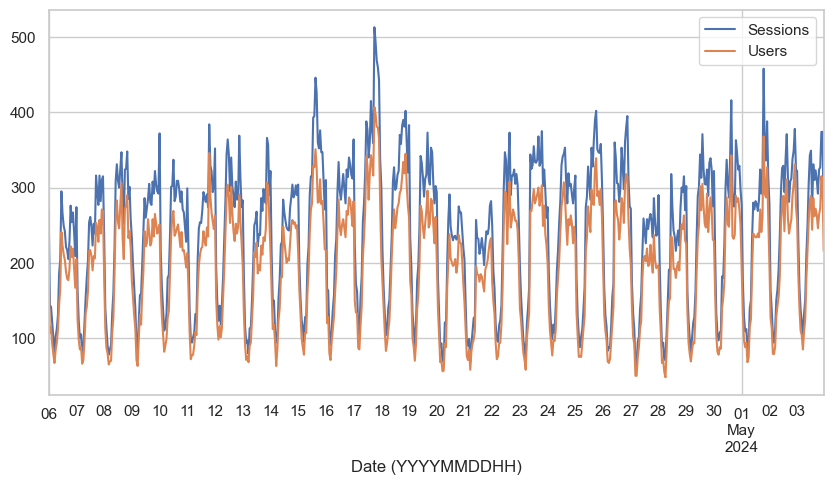

In [24]:
plt.figure(figsize=(10,5))
df.groupby("Date (YYYYMMDDHH)")[["Sessions", "Users"]].sum().plot(ax=plt.gca())
plt.show

# total users by channel

C:\Users\Jyoti kumari\AppData\Local\Temp\ipykernel_21928\2215299169.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Channel Group", y="Users", estimator=np.sum, palette="viridis")


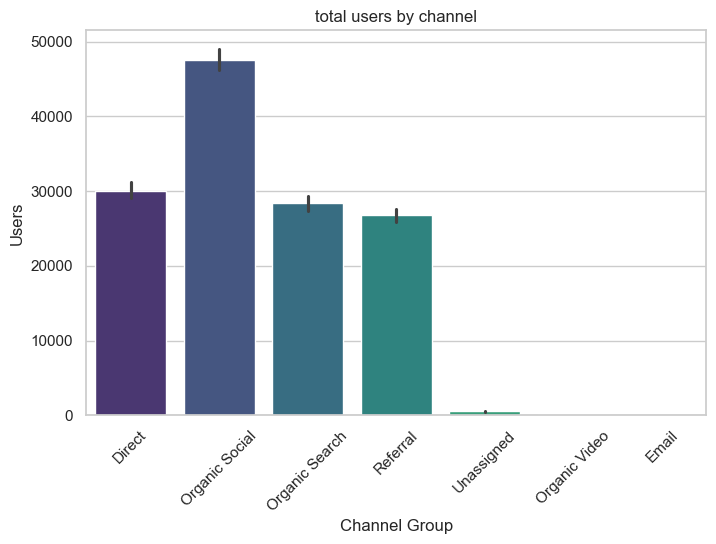

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Channel Group", y="Users", estimator=np.sum, palette="viridis")
plt.title("total users by channel")
plt.xticks(rotation=45)
plt.show()

# Average engagement time by channel

C:\Users\Jyoti kumari\AppData\Local\Temp\ipykernel_21928\3644504074.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Channel Group", y="Average engagement time per session", estimator=np.mean, palette="magma")


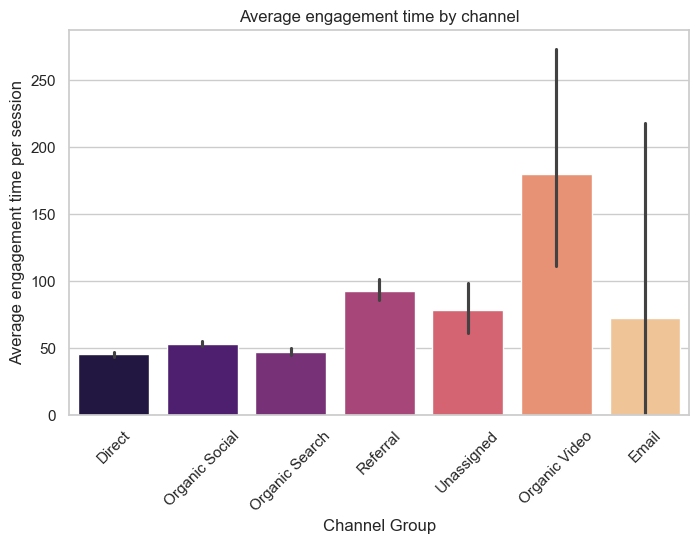

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Channel Group", y="Average engagement time per session", estimator=np.mean, palette="magma")
plt.title("Average engagement time by channel")
plt.xticks(rotation=45)
plt.show()

# Enagagement rate distribution by channel

C:\Users\Jyoti kumari\AppData\Local\Temp\ipykernel_21928\88948435.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Channel Group", y="Engagement rate", palette="magma")


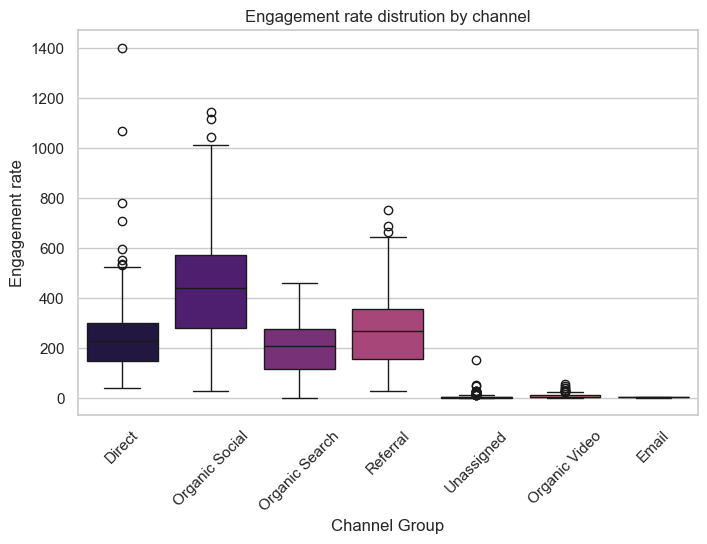

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Channel Group", y="Engagement rate", palette="magma")
plt.title("Engagement rate distrution by channel")
plt.xticks(rotation=45)
plt.show()

# Engaged vs Non engaged sessions

In [8]:
df.head()

,Channel Group,Date (YYYYMMDDHH),Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Event count,Engagement rate,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


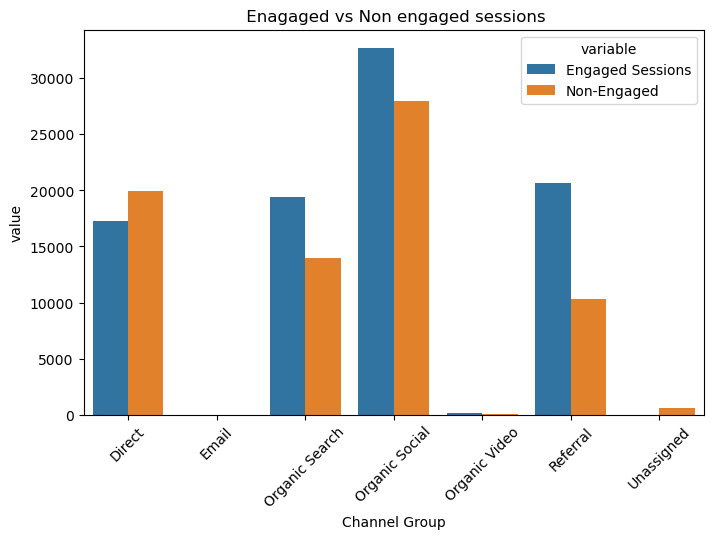

In [19]:
session_df = df.groupby("Channel Group")[["Sessions", "Engaged Sessions"]].sum().reset_index()
session_df["Non-Engaged"] = session_df["Sessions"] - session_df["Engaged Sessions"]
session_df_melted = session_df.melt(id_vars="Channel Group", value_vars=["Engaged Sessions", "Non-Engaged"])

plt.figure(figsize=(8,5))
sns.barplot(data=session_df_melted, x="Channel Group", y= "value", hue="variable")
plt.title(" Enagaged vs Non engaged sessions")
plt.xticks(rotation=45)
plt.show()
            

# Traffic by hour and channel

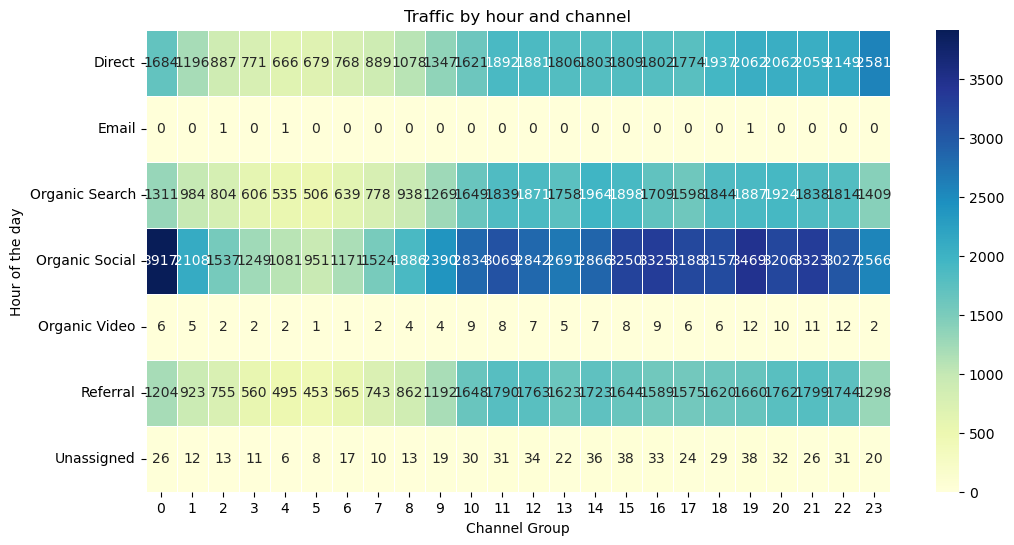

In [29]:
heatmap_data = df.groupby(["Channel Group", "Hour"])["Sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, annot=True, fmt='.0f')
plt.title("Traffic by hour and channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of the day")
plt.show()

# Enagagemnt rate vs sessions over time

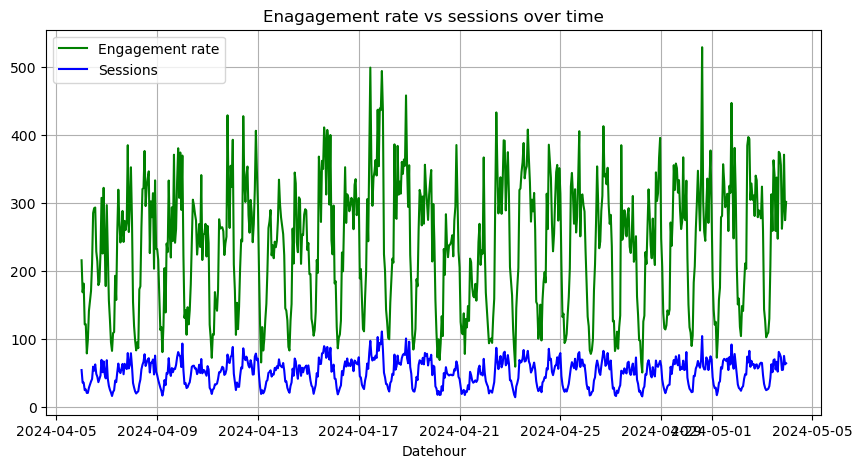

In [36]:
df_plot = df.groupby("Date (YYYYMMDDHH)")[["Engagement rate", "Sessions"]].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(df_plot["Date (YYYYMMDDHH)"], df_plot["Engagement rate"], label="Engagement rate", color="green")
plt.plot(df_plot["Date (YYYYMMDDHH)"], df_plot["Sessions"], label="Sessions", color="blue")
plt.title("Enagagement rate vs sessions over time")
plt.xlabel("Datehour")
plt.legend()
plt.grid(True)
plt.show()